In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [18]:
df = pd.read_parquet('../data/Electric_Vehicle_Population_Data_cleaned.parquet')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,CAFV_Class,Vehicle_Age,longitude,latitude
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.0,59900.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1,6,-122.23825,47.49461
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),291.0,59900.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10,1,5,-122.64681,47.73689
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),72.0,59900.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,0,2,-122.54729,47.42602
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),30.0,59900.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10,1,4,-122.81585,47.64509
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42.0,59900.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10,1,2,-122.68993,46.88897


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235191 entries, 0 to 235190
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             235191 non-null  object 
 1   County                 235191 non-null  object 
 2   City                   235191 non-null  object 
 3   State                  235191 non-null  object 
 4   Postal Code            235191 non-null  float64
 5   Model Year             235191 non-null  int64  
 6   Make                   235191 non-null  object 
 7   Model                  235191 non-null  object 
 8   Electric Vehicle Type  235191 non-null  object 
 9   Electric Range         235191 non-null  float64
 10  Base MSRP              235191 non-null  float64
 11  Legislative District   235191 non-null  float64
 12  DOL Vehicle ID         235191 non-null  int64  
 13  Vehicle Location       235191 non-null  object 
 14  Electric Utility       235191 non-nu

In [20]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,CAFV_Class,Vehicle_Age,longitude,latitude
count,235191.000000,235191.000000,235191.000000,235191.000000,235191.000000,2.351910e+05,2.351910e+05,235191.000000,235191.000000,235191.000000,235191.000000
mean,98269.331416,2021.407928,88.958748,59860.219205,28.879813,2.353300e+08,5.304009e+10,0.311011,3.592072,-122.063266,47.458544
std,310.577958,2.992152,66.036000,2710.549510,14.904769,6.799548e+07,1.644185e+07,0.462908,2.992152,1.053158,0.619193
min,98001.000000,2000.000000,6.000000,31950.000000,1.000000,4.385000e+03,5.300195e+10,0.000000,0.000000,-124.627350,45.579230
25%,98052.000000,2020.000000,72.000000,59900.000000,17.000000,2.054128e+08,5.303301e+10,0.000000,1.000000,-122.401990,47.328000
50%,98126.000000,2023.000000,72.000000,59900.000000,32.000000,2.523068e+08,5.303303e+10,0.000000,2.000000,-122.291790,47.603570
75%,98375.000000,2024.000000,72.000000,59900.000000,42.000000,2.696494e+08,5.305307e+10,1.000000,5.000000,-122.131580,47.722380
max,99403.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10,1.000000,25.000000,-117.043980,48.999760


In [21]:
features = ['Electric Range', 'Vehicle_Age', 'Base MSRP']
df_features = df[features].copy()
df_features['EV_Type'] = df['Electric Vehicle Type'].map({'Battery Electric Vehicle (BEV)': 1, 'Plug-in Hybrid Electric Vehicle (PHEV)': 0})
df_features['Make_encoded'] = pd.factorize(df['Make'])[0]
df_features.head()

,Electric Range,Vehicle_Age,Base MSRP,EV_Type,Make_encoded
0,220.0,6,59900.0,1,0
1,291.0,5,59900.0,1,0
2,72.0,2,59900.0,1,1
3,30.0,4,59900.0,0,2
4,42.0,2,59900.0,0,3


In [22]:
features_for_clustering = ['Electric Range', 'Vehicle_Age', 'Base MSRP', 'EV_Type', 'Make_encoded']
X = df_features[features_for_clustering]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

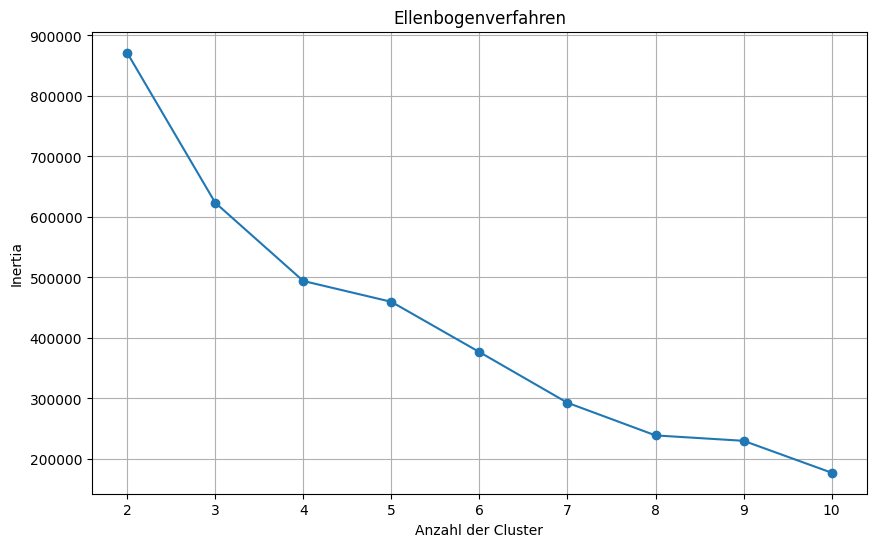

In [23]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Ellenbogenverfahren')
plt.grid(True)
plt.show()

In [24]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=60)
cluster_labels = kmeans.fit_predict(scaled_features)
df_features['Cluster'] = cluster_labels

In [25]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features_for_clustering)
centers_df.index.name = 'Cluster'
centers_df

,Electric Range,Vehicle_Age,Base MSRP,EV_Type,Make_encoded
Cluster,,,,,
0,72.233860,2.014737,59900.000000,1.000000e+00,5.349730
1,31.132762,3.426403,59945.056957,6.161738e-14,10.001762
2,62.507594,10.449443,58318.090893,5.890166e-01,7.417624
3,232.380545,6.605854,60346.118407,9.999724e-01,2.171127


In [26]:
cluster_sizes = df_features['Cluster'].value_counts().sort_index()
total_vehicles = len(df_features)
percentage = (cluster_sizes / total_vehicles * 100).round(2)

# Zusammenfassung erstellen
summary_df = pd.DataFrame({
    'Count': cluster_sizes,
    'Percentage': percentage,
    'Avg_Range': df_features.groupby('Cluster')['Electric Range'].mean().round(1),
    'Avg_Age': df_features.groupby('Cluster')['Vehicle_Age'].mean().round(1),
    'Avg_MSRP': df_features.groupby('Cluster')['Base MSRP'].mean().round(2),
    'BEV_Ratio': df_features.groupby('Cluster')['EV_Type'].mean().round(3)
})
summary_df

,Count,Percentage,Avg_Range,Avg_Age,Avg_MSRP,BEV_Ratio
Cluster,,,,,,
0,140191,59.61,72.2,2.0,59900.00,1.000
1,41435,17.62,31.1,3.4,59945.06,0.000
2,17317,7.36,62.5,10.4,58318.09,0.589
3,36248,15.41,232.4,6.6,60346.12,1.000


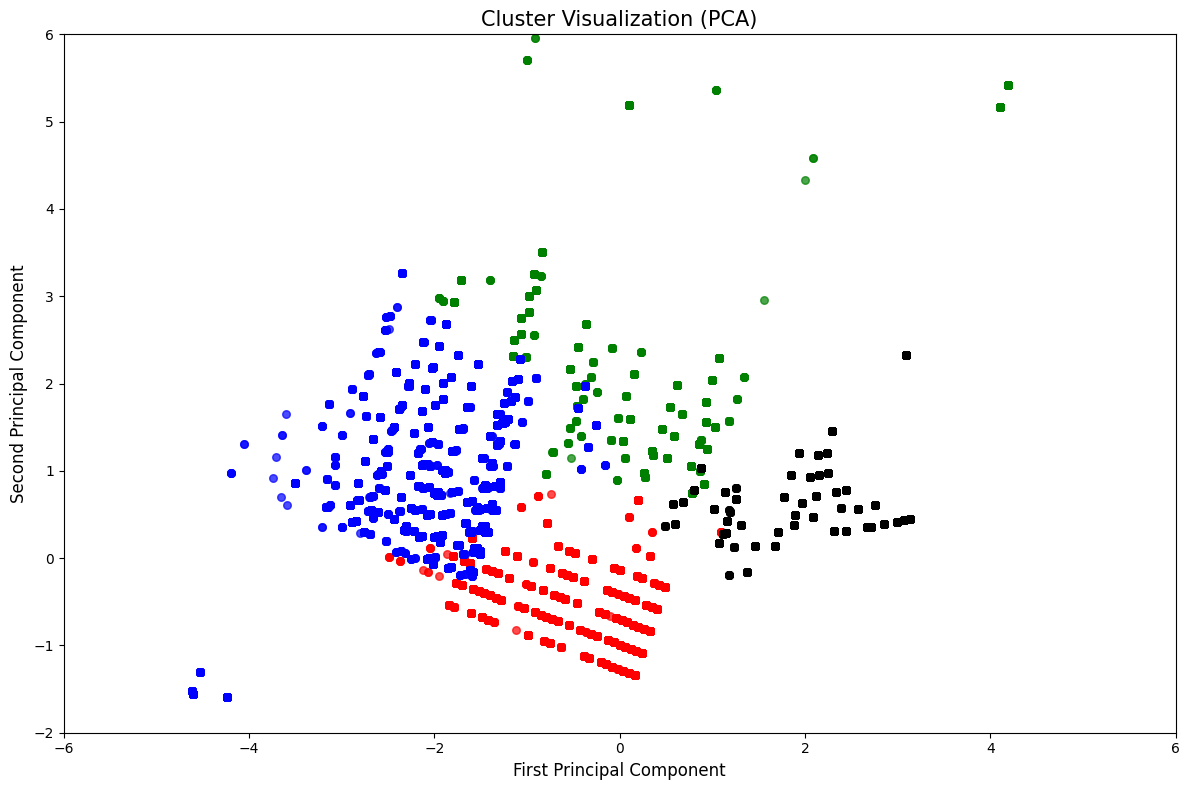

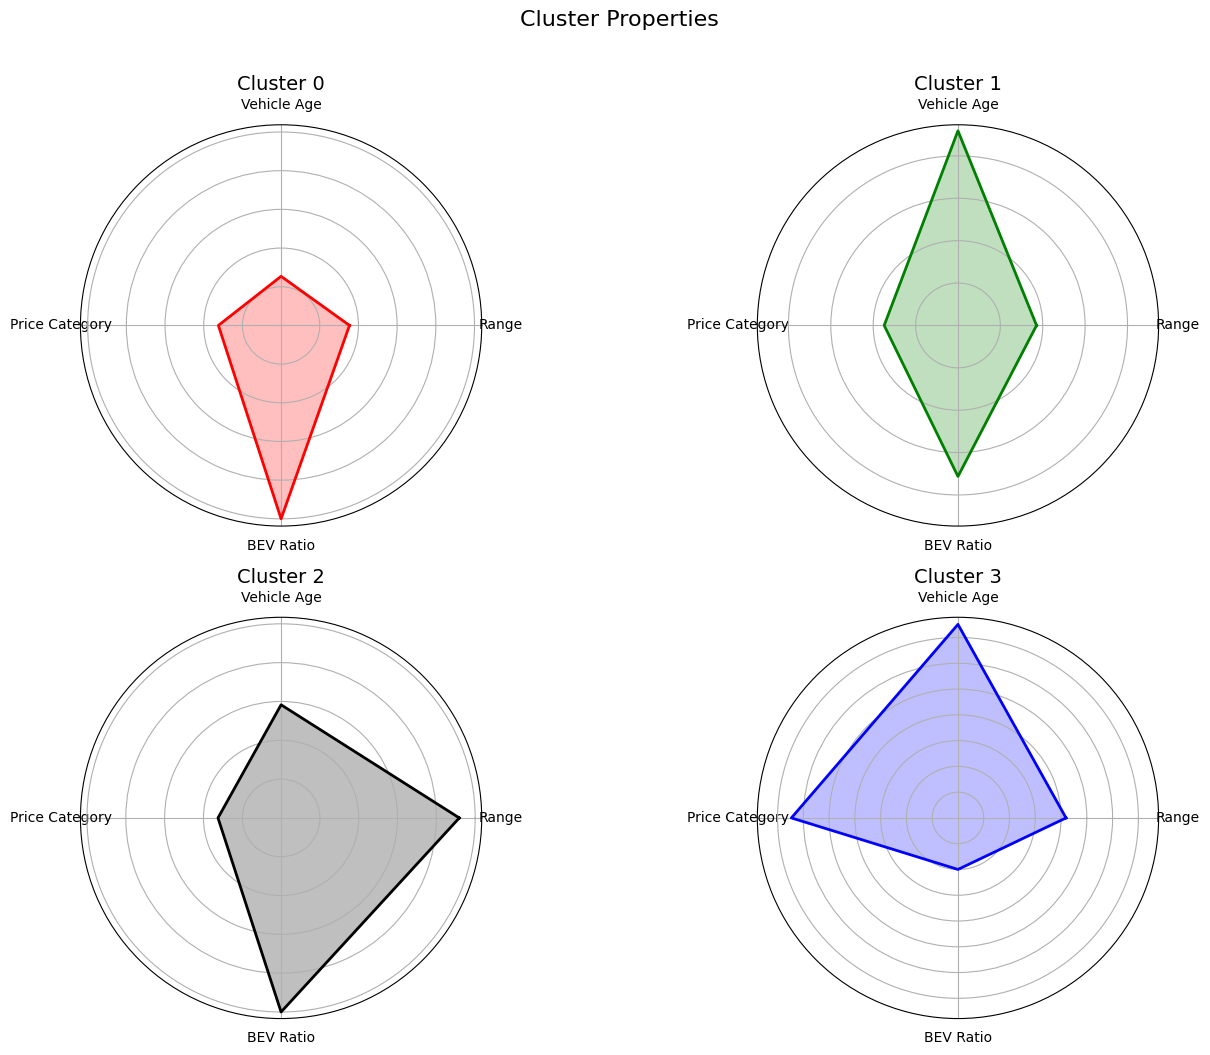

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

price_bins = [0, 40000, 60000, 80000, 120000, df_features['Base MSRP'].max()]
df_features['Price_Category'] = pd.cut(df_features['Base MSRP'], bins=price_bins, labels=False)

cat_features_for_clustering = ['Electric Range', 'Vehicle_Age', 'Price_Category', 'EV_Type', 'Make_encoded']
X_cat = df_features[cat_features_for_clustering]
scaler_cat = StandardScaler()
scaled_cat_features = scaler_cat.fit_transform(X_cat)

n_clusters = 4
kmeans_cat = KMeans(n_clusters=n_clusters, random_state=60)
cluster_labels_cat = kmeans_cat.fit_predict(scaled_cat_features)
df_features['Cluster_Cat'] = cluster_labels_cat

centers_cat = scaler_cat.inverse_transform(kmeans_cat.cluster_centers_)
centers_cat_df = pd.DataFrame(centers_cat, columns=cat_features_for_clustering)
centers_cat_df.index.name = 'Cluster'

summary_cat = pd.DataFrame({
    'Count': df_features['Cluster_Cat'].value_counts().sort_index(),
    'Percentage': (df_features['Cluster_Cat'].value_counts().sort_index() / len(df_features) * 100).round(2),
    'Avg_Range': df_features.groupby('Cluster_Cat')['Electric Range'].mean().round(1),
    'Avg_Age': df_features.groupby('Cluster_Cat')['Vehicle_Age'].mean().round(1),
    'Avg_MSRP': df_features.groupby('Cluster_Cat')['Base MSRP'].mean().round(0),
    'Price_Cat': df_features.groupby('Cluster_Cat')['Price_Category'].mean().round(2),
    'BEV_Ratio': df_features.groupby('Cluster_Cat')['EV_Type'].mean().round(3)
})

pca_cat = PCA(n_components=2)
pca_result_cat = pca_cat.fit_transform(scaled_cat_features)

plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'black', 'blue']
for i in range(n_clusters):
    plt.scatter(pca_result_cat[cluster_labels_cat == i, 0], pca_result_cat[cluster_labels_cat == i, 1], 
                c=colors[i], s=30, alpha=0.7)
plt.title('Cluster Visualization (PCA)', fontsize=15)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.xlim(-6, 6)
plt.ylim(-2, 6)
plt.grid(False)
plt.tight_layout()
plt.show()

features_for_radar = ['Electric Range', 'Vehicle_Age', 'Price_Category', 'EV_Type']
features_names = ['Range', 'Vehicle Age', 'Price Category', 'BEV Ratio']
n_features = len(features_for_radar)

normalized_centers = []
for i in range(n_clusters):
    center_values = centers_cat[i, :-1].copy()
    
    min_values = np.array([0, 0, 0, 0])
    max_values = np.array([
        centers_cat[:, 0].max() * 1.1,
        centers_cat[:, 1].max() * 1.1,
        4.0,
        1.0
    ])
    
    normalized = 0.1 + 0.9 * (center_values - min_values) / (max_values - min_values)
    normalized_centers.append(normalized)

angles = np.linspace(0, 2*np.pi, n_features, endpoint=False).tolist()
angles += angles[:1]

fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(polar=True))
axs = axs.flatten()

for i in range(n_clusters):
    values = normalized_centers[i].tolist()
    values += values[:1]
    
    ax = axs[i]
    ax.plot(angles, values, color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features_names)
    ax.set_title(f'Cluster {i}', size=14)
    
    ax.grid(True)
    ax.set_yticklabels([])
    
plt.tight_layout()
plt.suptitle('Cluster Properties', size=16, y=1.05)
plt.show()

```
Calinski-Harabasz Score: 88321.25592255326
Silhouette Score: 0.5311531798894417
```

In [28]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

ch_score = calinski_harabasz_score(scaled_cat_features, cluster_labels_cat)
print("Calinski-Harabasz Score:", ch_score)
sil_score = silhouette_score(scaled_cat_features, cluster_labels_cat)
print("Silhouette Score:", sil_score)

Calinski-Harabasz Score: 88321.25592255326
Silhouette Score: 0.5311531798894417
